# CUNY-HACKATHON-2019

# Youtube’s automated speech recognition, closed captioning and sentiment analysis from non-native English speakers.

**Duubar Villalobos Jimenez (CUNY SPS Masters in Data Science) &**

**Team(CUNY Baruch College**

New York City, New York.


10.18.2019

# Overview

## Our initial question is as follows: 

1. Is YouTube’s speech recognition technology accurate for various accents?

2. Does YouTube’s automatic speech recognition affect the expressed sentiment of the spoken words given by a non-native English-speaking person?

## Team Building



## Project Proposal


# Extract automated transcript from YouTube video

The following script, is a python generated code in which we will use in order to extract the automatic generated transcript from youtube.

This is a python API which allows you to get the transcripts/subtitles for  a given YouTube video. It also works for automatically generated subtitles and it does not require a headless browser, like other selenium based solutions do!

For further learning, visit [https://pypi.org/project/youtube-transcript-api/](https://pypi.org/project/youtube-transcript-api/)

In [1]:
# To supress warning messages
import warnings
warnings.simplefilter('ignore')

In [2]:
import os
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [3]:
# https://pypi.org/project/youtube-transcript-api/
from youtube_transcript_api import YouTubeTranscriptApi
import numpy as np
import pandas as pd 
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# Let's define the StopWords
STOPWORDS = set(STOPWORDS)
STOPWORDS.add("yeah")
STOPWORDS.add("hmm")
STOPWORDS.add("mm")

# YouTube Example 1

In this example, we have captured the automated transcription generated by YouTube. We then, will compare the original transcript to the automated generated transcript and perform a small introductory analysis in order to gather some initial insights.

In [11]:
# Extract transcript from the video directly from Youtube
# The transcript will return a list with the following column indicators
# "duration", "start", "text"

# Function that extract the YouTube automated transcript
def getYouTubeTranscript(YouTubeID):

    # Extract transcript by following https://pypi.org/project/youtube-transcript-api/
    transcript = YouTubeTranscriptApi.get_transcript(YouTubeID)

    # Convert from Json list into Pandas.DataFrame
    df_YouTube = pd.DataFrame(transcript)
    
    # Rename columns for automated captioning file from YouTube
    df_YouTube.columns = ['Duration','Start','Automated']
    
    # Create a replica of the Automated captioning column
    df_YouTube['Manual'] = df_YouTube['Automated']

    # Return transcript
    return(df_YouTube);


In [16]:
# Function that exports the gathered YouTube automated caption to a local csv file
def export_df_ToCSV(df, d, YouTubeID):
    
    # Exporting file to csv
    df.to_csv(d + "/data/Transcripts/" + YouTubeID + "-YouTube.csv", encoding='utf-8', index=False)
    
    return;

Let's extract an example from YouTube.

In [71]:
# Get YouTube automated transcripts
# The link for our first video to test our hypothesis is as follows: 
# https://www.youtube.com/watch?v=a16z2mE_69s

# Function that read all scripts from a list, one by one using a for loop
def get_FromYouTube_ToCSV(YouTubeIDList, d):
    

    for videoID in YouTubeIDList:

        # Extract captioning from YouTube and export to csv file
        print('Extracting video ID: ' + videoID)

        # Extract automated video transcript from YouTube
        df_YouTube = getYouTubeTranscript(videoID)

        # Export to local csv file
        export_df_ToCSV(df_YouTube, d, videoID)
        
        
    print('\nSuccessfully completed.')
    
    return;

In [77]:
# Extract captions from list of YouTube videos listed on a csv file
video_List = pd.read_csv( d + "/data/Data_Podcast-AtTheEndOfTheDay.csv")

In [78]:
video_List_No = video_List[video_List['Automated_Captions'] == 'No']
video_List_Yes = video_List[video_List['Automated_Captions'] == 'Yes']
#video_List_Yes
#video_List_No

,Episode,Title,YouTube_ID,Automated_Captions,Guest,Gender,Recording_Location,Controlled_Studio,Background_Noise,Country_of_Origin,Main_Language,Years_in_US,US_Education,ESL_Classes_in_US,Moved_In_As,Profession
0,1,Why journalism in the USA?,w1CVE-bB4AI,Yes,"Dipika, Anuz","Female, Male",New York,No,Yes,"Nepal, Nepal","Nepali, Nepali",4,Yes,Yes,Adult,"Journalism, Journalism"
1,2,Stepping out of your comfort zone,wJZkEhi4IUA,Yes,"Dipika, Anuz","Female, Male",New York,No,Yes,"Nepal, Nepal","Nepali, Nepali",4,Yes,Yes,Adult,"Journalism, Journalism"
2,3,Following your dream,FwzUcNVlkMM,Yes,"Dipika, Anuz, Adhish","Female, Male, Male",Florida,No,Yes,"Nepal, Nepal, Nepal","Nepali, Nepali, Nepali",13,Yes,Yes,Teenager,"Journalism, Journalism, Aerospace Engineering"
3,4,Reaching Out To People,qUWFvkgYlzA,Yes,"Dipika, Anuz","Female, Male",New York,No,Yes,"Nepal, Nepal, Nepal","Nepali, Nepali, Nepali",4,Yes,Yes,Adult,"Journalism, Journalism"
4,5,Thwiba's Journey from Sudan to New York (Part 1),z21ZmUbgfnE,Yes,"Dipika, Anuz, Thwiba","Female, Male, Female",New York,No,Yes,"Nepal, Nepal, Sudan","Nepali, Nepali, Arabic",5,No,Yes,Adult,"Journalism, Journalism, Project Management"
5,6,How to find a Mentor? - Thwiba's Journey from ...,OCfwDT0RTgM,Yes,"Dipika, Anuz, Thwiba","Female, Male, Female",New York,No,Yes,"Nepal, Nepal, Sudan","Nepali, Nepali, Arabic",5,No,Yes,Adult,"Journalism, Journalism, Project Management"
7,8,Be Comfortable With Your Accent,4aTLo1lGAe0,Yes,"Dipika, Anuz, Jorge","Female, Male, Male",New York,Yes,No,"Nepal, Nepal, El Salvador","Nepali, Nepali, Spanish",3,No,No,Adult,"Journalism, Journalism, Teaching"
9,10,Preparing Your College Application in the US (...,KBT2F0hdqQc,Yes,"Dipika, Anuz, Svetlana","Female, Male, Female",New York,Yes,No,"Nepal, Nepal, Russia","Nepali, Nepali, Russian",4,Yes,Yes,Adult,"Journalism, Journalism, Risk Management"
10,11,Preparing Your College Application in the US (...,1CL3U769hAE,Yes,"Dipika, Anuz, Svetlana","Female, Male, Female",New York,Yes,No,"Nepal, Nepal, Russia","Nepali, Nepali, Russian",4,Yes,Yes,Adult,"Journalism, Journalism, Risk Management"
11,12,Be Determined Enough To Do It,ZS3C9q7e3kM,Yes,"Dipika, Anuz, Licelle","Female, Male, Female",New York,Yes,Yes,"Nepal, Nepal, Philippines","Nepali, Nepali, Filipino",14,Yes,Yes,Adult,"Journalism, Journalism, Attorney"


In [79]:
# Extract Closed Captionings from Video List
YouTubeIDList = list(video_List_Yes['YouTube_ID'])
len(YouTubeIDList)
YouTubeIDList

['w1CVE-bB4AI',
 'wJZkEhi4IUA',
 'FwzUcNVlkMM',
 'qUWFvkgYlzA',
 'z21ZmUbgfnE',
 'OCfwDT0RTgM',
 '4aTLo1lGAe0',
 'KBT2F0hdqQc',
 '1CL3U769hAE',
 'ZS3C9q7e3kM',
 'NmHlrD15cbc',
 'wtgbWPLl-Yw',
 'MRye9ftVDTk',
 'MBxm6JoB4_g',
 'Msb7qLBpGmI',
 'KhfzjwSAWfY',
 'tL6ubpL4ncw',
 'qQ-6VynZHo0',
 'luRh3zMpjbA',
 'fMrUvcoUZWE',
 'kJeOX-ovi_g',
 'nbPCcXmJT0g',
 'pMm_QkZmmuo',
 'mghyDTCzmVs',
 'TegfQr6sud4',
 'T0Y8Mwz7uAI',
 '-WplasXFav4',
 'oOUTplHlK7g',
 'yI3k91L1hng',
 'WuK-7WvBs6Q',
 '4i4yrXd0cKU',
 'Tvux0IbEFxA',
 'wxtM9qVR1I0',
 'dJBKIMSyysQ',
 'YkCqG_Y4IFQ',
 'AEHsXYtn5eY',
 'J0Clde0OjYs',
 '2A1P-qqZJik',
 'ib-w9vKRBv4',
 'Mwcqa0xfWFE',
 'VejynYemnVQ',
 'E5RmvMt4_mw',
 'mmPkFc9W9v8',
 'HqhL8B2ohko',
 'xtNBDzgWt2I',
 'juInspMtHzM',
 'VAi7Tr5RS1Y',
 'MBfACFrRgsQ',
 'lnN_-R0qEDk',
 'yM3M1mTx3A4',
 'kaZR1uWYhWI',
 'a16z2mE_69s',
 'o1MO8SsY9-E',
 '1UOdEZc4b20',
 'Tz5EXzOflmg',
 'GuCVoEH42bk',
 'fB8Vwn5UsWA',
 '6HgCGH7G_rI',
 '7jff8Y9zvV0',
 '_2rFID7iRPI',
 '0LTcqH6hyLo']

In [80]:
# Calling function that will extract the automated captioning from YouTube videos,
# and prepare the Manual captioning file for editing with manual corrected transcriptions.
get_FromYouTube_ToCSV(YouTubeIDList, d)

Extracting video ID: w1CVE-bB4AI
Extracting video ID: wJZkEhi4IUA
Extracting video ID: FwzUcNVlkMM
Extracting video ID: qUWFvkgYlzA
Extracting video ID: z21ZmUbgfnE
Extracting video ID: OCfwDT0RTgM
Extracting video ID: 4aTLo1lGAe0
Extracting video ID: KBT2F0hdqQc
Extracting video ID: 1CL3U769hAE
Extracting video ID: ZS3C9q7e3kM
Extracting video ID: NmHlrD15cbc
Extracting video ID: wtgbWPLl-Yw
Extracting video ID: MRye9ftVDTk
Extracting video ID: MBxm6JoB4_g
Extracting video ID: Msb7qLBpGmI
Extracting video ID: KhfzjwSAWfY
Extracting video ID: tL6ubpL4ncw
Extracting video ID: qQ-6VynZHo0
Extracting video ID: luRh3zMpjbA
Extracting video ID: fMrUvcoUZWE
Extracting video ID: kJeOX-ovi_g
Extracting video ID: nbPCcXmJT0g
Extracting video ID: pMm_QkZmmuo
Extracting video ID: mghyDTCzmVs
Extracting video ID: TegfQr6sud4
Extracting video ID: T0Y8Mwz7uAI
Extracting video ID: -WplasXFav4
Extracting video ID: oOUTplHlK7g
Extracting video ID: yI3k91L1hng
Extracting video ID: WuK-7WvBs6Q
Extracting

# Individual Study

Let's read the orginal transcript for one single example.

In [ ]:
# Define an individual YoutubeID to compare
YouTubeID = 'w1CVE-bB4AI' #'a16z2mE_69s'

# Import previously downloaded YouTube transcript
df_YouTube = pd.read_csv( d + "/data/Transcripts/"+YouTubeID+"-YouTube.csv")


Let's take a look at the comparison

In [22]:
# Add correct transcript column next to YouTube automated transcript column
def compareTranscripts(df_YouTube):

    # Finding out if there's a difference in the text
    df_YouTube['Different'] = np.where((df_YouTube['Automated'] == df_YouTube['Manual']), 'No', 'Yes')

    return(df_YouTube);

In [23]:
# Let's have a small visualization
df = compareTranscripts(df_YouTube)

In [24]:
# Comparing the first 10 records.
df.head(10)

,Duration,Start,Automated,Manual,Different
0,4.360,3.250,hi my name is gizelle I come from,hi my name is gizelle I come from,No
1,3.660,5.840,Kazakhstan and I have been living in New,Kazakhstan and I have been living in New,No
2,4.290,7.610,York for a little bit more than a year,York for a little bit more than a year,No
3,4.320,9.500,I'm a program associated Newman New,I'm a program associated Newman New,No
4,3.479,11.900,Yorkers in an organization that is,Yorkers in an organization that is,No
5,3.330,13.820,helping immigrant women to find their,helping immigrant women to find their,No
6,4.861,15.379,first fulfilling job in New York and,first fulfilling job in New York and,No
7,4.680,17.150,today I am with a news and Deepika and,today I am with a news and Deepika and,No
8,4.050,20.240,we're recording the podcast at the end,we're recording the podcast at the end,No
9,3.750,21.830,of the day thank you so much gizelle for,of the day thank you so much gizelle for,No


Let's visualize the duration frequency.

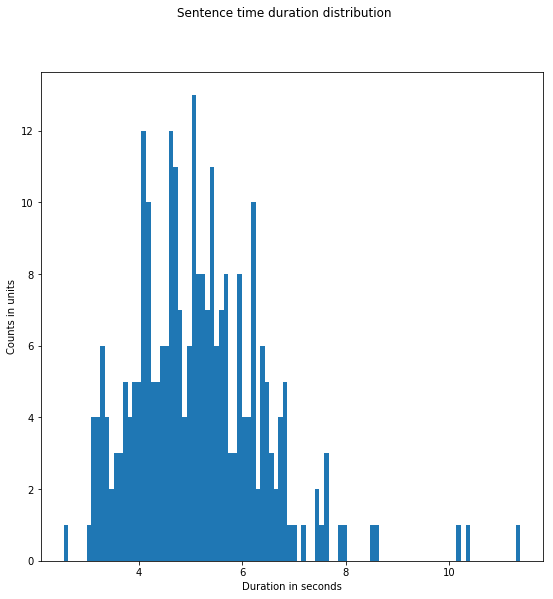

In [25]:
fig, axs = plt.subplots(figsize=(9, 9), sharey=True)

# We can set the number of bins with the `bins` kwarg
axs.hist(df['Duration'], bins=100)
axs.set_xlabel('Duration in seconds')
axs.set_ylabel('Counts in units')
fig.suptitle('Sentence time duration distribution');

Now, let's visualize the differences observed in the transcripts.

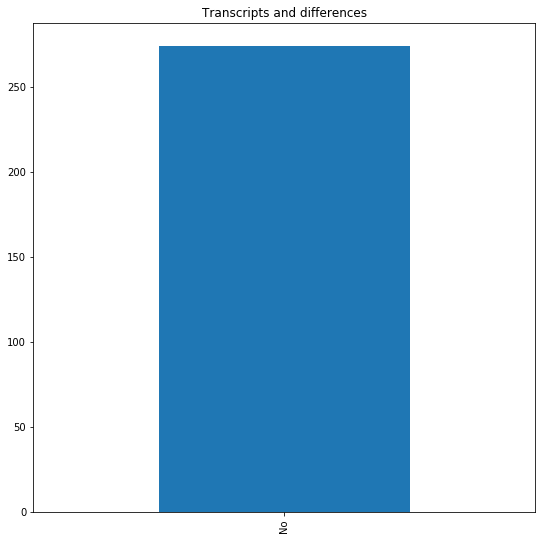

In [26]:
df['Different'].value_counts().plot(kind='bar',
                                    title='Transcripts and differences',
                                    figsize=(9, 9));

From the above plot, we can now start wondering if the question we have formulated, could help us understand if the automated YouTube transcript has any effect in the sentiment of the message.

## Word Cloud

The following procedure will extract a wordcloud from the captionings.

In [27]:
# In order to extract valuable information, we need to make sure our text is converted to string
df['Automated'] = df['Automated'].astype(str)
df['Manual'] = df['Manual'].astype(str)

In order to extract the core of the message, all the stop words will be removed.

In [37]:
# Example of STOPWORDS
df_StopWords = pd.DataFrame(list(STOPWORDS),columns =['STOPWORDS'])
df_StopWords.columns = ['STOPWORDS']
df_StopWords.head(10)

,STOPWORDS
0,here
1,than
2,such
3,who
4,or
5,do
6,his
7,hmm
8,since
9,your


Function that extract the WordCloud from a Pandas data frame column.

In [38]:
# Returning Wordcloud captioning fom Pandas Data frame column
def getWordCloud(df, Column):

    ## Join all sentences in the Automated YouTube corpus
    text = ' '.join(df[Column])

    wc = WordCloud(width = 800,
                   height = 800, 
                   background_color ='black',
                   stopwords = STOPWORDS,
                   min_font_size = 10)
    
    wc = wc.generate(text)
    
    return(wc);


Function that plot an already extracted WordCloud from a Pandas data frame column.

In [39]:
# Procedure to plot wordcloud from based on a column
def WordCloudImage(Cloud):
    
    # read the mask image
    # taken from
    # https://www.cleanpng.com/png-immigration-israel-computer-icons-aliyah-family-to-2502696/download-png.html
    
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')    
    plt.imshow(Cloud, 
               interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
    return;

Let's extract the respective WordClouds for the Automated YouTube captioning and the Original captioning.

In [40]:
# Extract WordCloud from YouTube's automatic transcript
wordcloud_YouTube = getWordCloud(df, 'Automated')
# Extract WordCloud from Original Transcript
wordcloud_Manual = getWordCloud(df, 'Manual')

## Youtube Automated captioning WordCloud

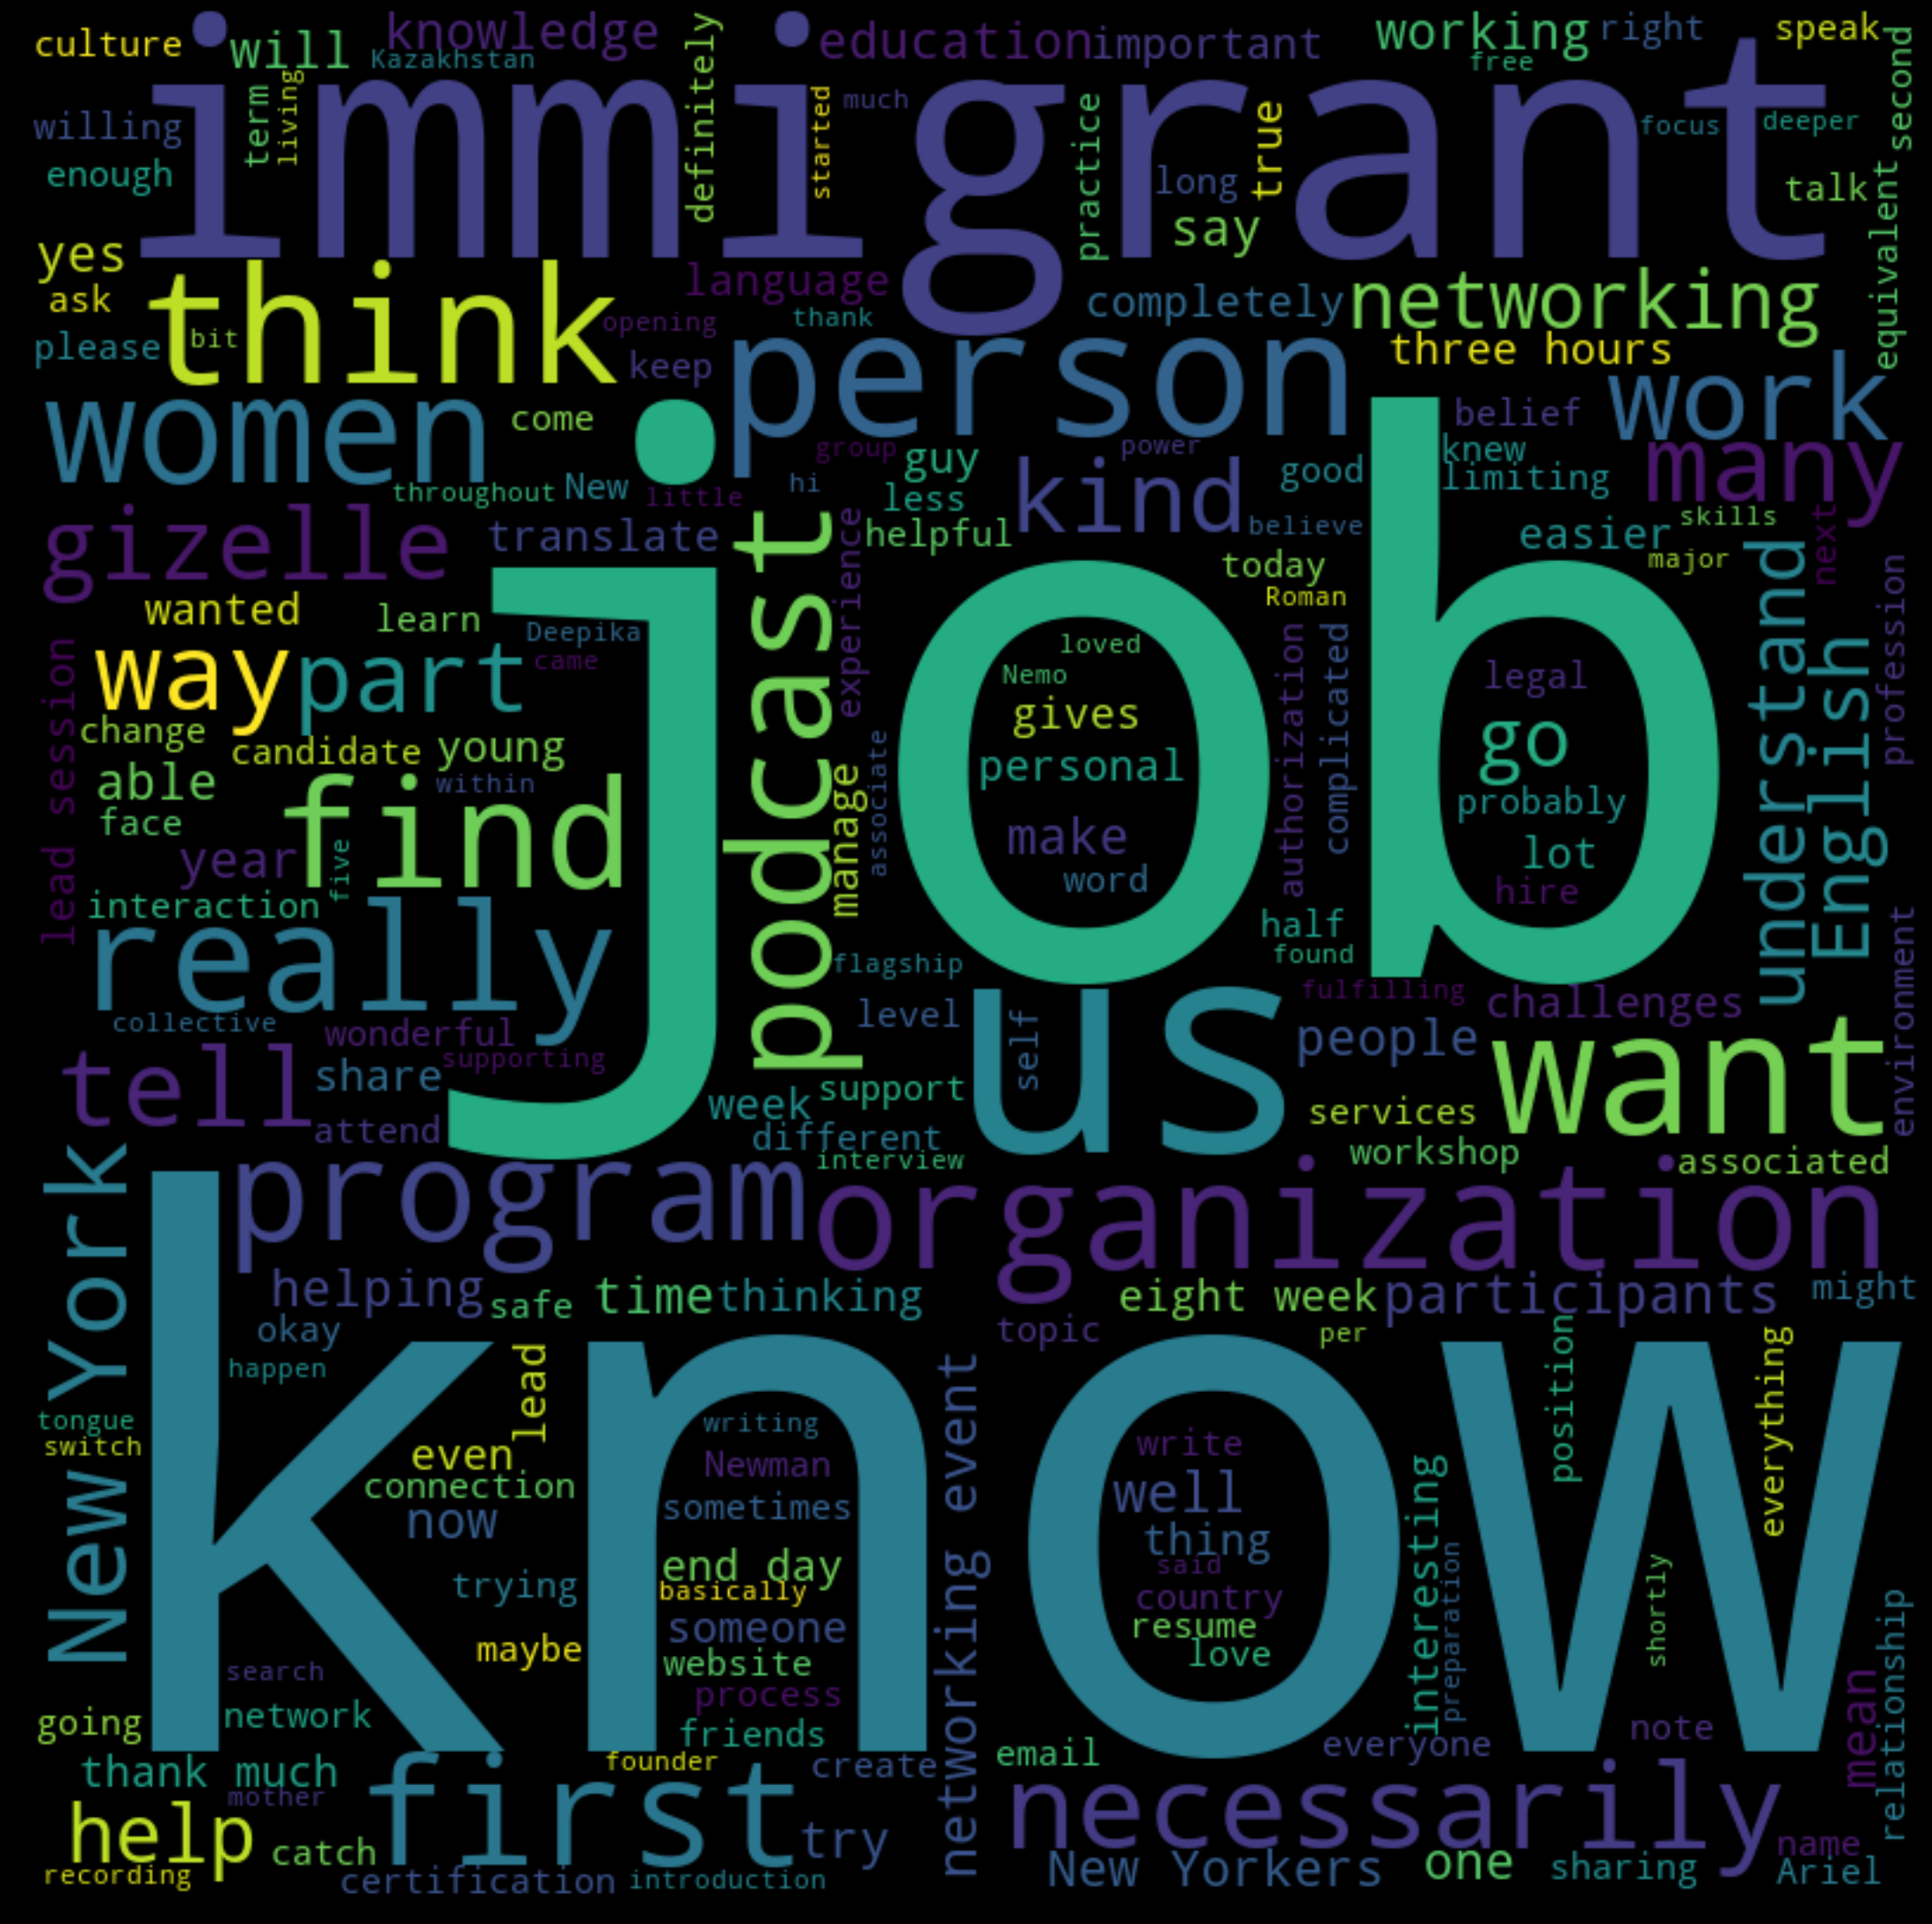

In [41]:
# Return WordCloud for YouTube Automated Transcription
WordCloudImage(wordcloud_YouTube)

## Original captioninig WordCloud.

In [ ]:
# Return WordCloud for Manual Transcription
WordCloudImage(wordcloud_Manual)